### Wrangling and Analyze Data

Prepared by: Ashley Mahaffey

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [400]:
import pandas as pd
import numpy as np
import requests as r
import json as j
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
twitter_archive = pd.read_csv('/Users/ashleymahaffey/Desktop/DA/twitter-archive-enhanced.csv')

In [402]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [403]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]

response = requests.get(url)

if response.status_code == 200:
    # Write the content to a file
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"File {file_name} downloaded successfully.")
else:
    print("Failed to download the file.")
    
# Load the TSV file into a DataFrame
image_predictions = pd.read_csv(file_name, sep='\t')

# Display the first few rows of the DataFrame
print(image_predictions.head())

File image-predictions.tsv downloaded successfully.
             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [404]:
# Create an empty list to store tweet data
tweets_data = []

# Open the 'tweet_json.txt' file and read data line by line
with open('tweet_json.txt', 'r') as file:
    for line in file:
        try:
            # Parse the JSON data from each line
            tweet_data = json.loads(line)
            
            # Extract the relevant information (tweet ID, retweet count, favorite count)
            tweet_id = tweet_data['id']
            retweet_count = tweet_data['retweet_count']
            favorite_count = tweet_data['favorite_count']
            
            # Append the data to the list
            tweets_data.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
        except json.JSONDecodeError as e:
            print(f"Skipped a line due to JSONDecodeError: {e}")
            continue

# Create a DataFrame from the list of tweet data
tweet_df = pd.DataFrame(tweets_data)

# Display the first few rows of the DataFrame
print(tweet_df.head())

Skipped a line due to JSONDecodeError: Unterminated string starting at: line 1 column 297 (char 296)
             tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Programmatic Assessment: Quality Issues

In [405]:
# 1 Non-Dog Ratings
# Filter out retweets
original_tweets = twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

# Filter out tweets without images
tweets_with_images = original_tweets[original_tweets['tweet_id'].isin(image_predictions['tweet_id'])]

# Check for non-dog ratings
non_dog_ratings = tweets_with_images[~tweets_with_images['text'].str.contains('dog|pup|pupper|floofer', case=False)]

# Display non-dog ratings for visual assessment
non_dog_ratings[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Display information about non-dog ratings programmatically
print("Number of non-dog ratings:", len(non_dog_ratings))

Number of non-dog ratings: 1149


In [406]:
# 2 Missing Values in Key Columns
# Check for missing values in twitter_archive
missing_twitter_archive = twitter_archive.isnull().sum()

# Check for missing values in image_predictions
missing_image_predictions = image_predictions.isnull().sum()

# Output
print("Missing Values in twitter_archive:")
print(missing_twitter_archive[missing_twitter_archive > 0])

print("\nMissing Values in image_predictions:")
print(missing_image_predictions[missing_image_predictions > 0])

Missing Values in twitter_archive:
in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

Missing Values in image_predictions:
Series([], dtype: int64)


In [407]:
# 3 Inconsistent Datatypes
# Check datatypes in twitter_archive
datatypes_twitter_archive = twitter_archive.dtypes

# Check datatypes in image_predictions
datatypes_image_predictions = image_predictions.dtypes

# Output
print("Datatypes in twitter_archive:")
print(datatypes_twitter_archive)

print("\nDatatypes in image_predictions:")
print(datatypes_image_predictions)

Datatypes in twitter_archive:
tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Datatypes in image_predictions:
tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


In [408]:
# 4 Missing Values in 'doggo,' 'floofer,' 'pupper,' 'puppo' Columns
missing_dog_stages = twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].isnull().sum()
print("Missing Values in Dog Stages:")
print(missing_dog_stages)

Missing Values in Dog Stages:
doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64


In [409]:
# 5 Duplicate Dog Names
# Check for duplicate dog names in twitter_archive
duplicate_names_twitter_archive = twitter_archive[twitter_archive.duplicated(subset=['name'], keep=False)]

# Output
print("Duplicate Dog Names in twitter_archive:")
print(duplicate_names_twitter_archive[['tweet_id', 'name']])

Duplicate Dog Names in twitter_archive:
                tweet_id      name
0     892420643555336193   Phineas
2     891815181378084864    Archie
4     891327558926688256  Franklin
5     891087950875897856       NaN
6     890971913173991426       Jax
...                  ...       ...
2351  666049248165822465       NaN
2352  666044226329800704         a
2353  666033412701032449         a
2354  666029285002620928         a
2355  666020888022790149       NaN

[1694 rows x 2 columns]


In [410]:
# 6 Incorrect Dog Names
# Check for incorrect dog names in twitter_archive
incorrect_names_twitter_archive = twitter_archive[pd.notna(twitter_archive['name']) & twitter_archive['name'].str.islower()]

# Output
print("Incorrect Dog Names in twitter_archive:")
print(incorrect_names_twitter_archive)

Incorrect Dog Names in twitter_archive:
                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22    887517139158093824                    NaN                  NaN   
56    881536004380872706                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
169   859196978902773760                    NaN                  NaN   
193   855459453768019968                    NaN                  NaN   
...                  ...                    ...                  ...   
2349  666051853826850816                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   

                      timestamp  \
22    2017-07-19 03:39:09 +0000   
56    2017-07-02 15:32:16

In [411]:
# 7 Inconsistent Ratings in Text
# Extract ratings from text in twitter_archive
extracted_ratings_twitter_archive = twitter_archive['text'].str.extract(r'(\d+(\.\d+)?/\d+)')

# Output
print("Inconsistent Ratings in Text:")
print(extracted_ratings_twitter_archive[0].value_counts())

Inconsistent Ratings in Text:
0
12/10       558
11/10       463
10/10       461
13/10       351
9/10        156
8/10        102
14/10        54
7/10         53
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
9.75/10       2
0/10          2
9/11          2
15/10         2
420/10        2
4/20          2
44/40         1
45/50         1
60/50         1
7/11          1
143/130       1
121/110       1
99/90         1
20/16         1
9.5/10        1
11.26/10      1
144/120       1
88/80         1
80/80         1
11.27/10      1
50/50         1
204/170       1
1776/10       1
165/150       1
24/7          1
84/70         1
007/10        1
11/15         1
960/00        1
182/10        1
666/10        1
17/10         1
13.5/10       1
1/2           1
Name: count, dtype: int64


In [412]:
# 8 Outliers in retweet and favorite counts
# Identify outliers in retweet and favorite counts
outliers_retweet_count = tweet_df.query('retweet_count > retweet_count.mean() + 3 * retweet_count.std()')
outliers_favorite_count = tweet_df.query('favorite_count > favorite_count.mean() + 3 * favorite_count.std()')

print("\nOutliers in Retweet Counts:")
print(outliers_retweet_count)

print("\nOutliers in Favorite Counts:")
print(outliers_favorite_count)


Outliers in Retweet Counts:
                tweet_id  retweet_count  favorite_count
41    884247878851493888          21298           74423
65    879415818425184262          45849          107956
114   870374049280663552          27680           85011
117   869988702071779329          25661               0
131   866816280283807744          32883               0
134   866450705531457537          32883          106827
153   862096992088072192          21840           66437
154   861769973181624320          37911               0
164   860177593139703809          33421               0
168   859196978902773760          25661           75193
259   842892208864923648          56625               0
302   836397794269200385          31314               0
309   835309094223372289          24013               0
412   822872901745569793          48265          132810
445   819015337530290176          42228               0
446   819015331746349057          21794               0
447   8190064008819

### Programmatic Assessment: Tidiness Issues

In [413]:
# 1 Dog Stage Spread Across Multiple Columns
# Check for rows where a tweet has multiple dog stage entries
multiple_stages = twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x.count(), axis=1)
tweets_with_multiple_stages = twitter_archive[multiple_stages > 1]

# Display tweets with multiple dog stages
print(tweets_with_multiple_stages[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']])

                tweet_id  doggo  floofer  pupper  puppo
191   855851453814013952  doggo      NaN     NaN  puppo
200   854010172552949760  doggo  floofer     NaN    NaN
460   817777686764523521  doggo      NaN  pupper    NaN
531   808106460588765185  doggo      NaN  pupper    NaN
565   802265048156610565  doggo      NaN  pupper    NaN
575   801115127852503040  doggo      NaN  pupper    NaN
705   785639753186217984  doggo      NaN  pupper    NaN
733   781308096455073793  doggo      NaN  pupper    NaN
778   775898661951791106  doggo      NaN  pupper    NaN
822   770093767776997377  doggo      NaN  pupper    NaN
889   759793422261743616  doggo      NaN  pupper    NaN
956   751583847268179968  doggo      NaN  pupper    NaN
1063  741067306818797568  doggo      NaN  pupper    NaN
1113  733109485275860992  doggo      NaN  pupper    NaN


In [414]:
# 2 One Observational Unit in Each Dataframe
# Check if the tweet_id is unique in each dataframe
unique_twitter_archive = twitter_archive['tweet_id'].nunique()
unique_image_predictions = image_predictions['tweet_id'].nunique()
unique_tweet_df = tweet_df['tweet_id'].nunique()

print("Number of unique tweet IDs in Twitter Archive:", unique_twitter_archive)
print("Number of unique tweet IDs in Image Predictions:", unique_image_predictions)
print("Number of unique tweet IDs in Tweet DataFrame:", unique_tweet_df)

# Check if there is any overlap in tweet IDs across dataframes
common_tweet_ids = set(twitter_archive['tweet_id']) & set(image_predictions['tweet_id']) & set(tweet_df['tweet_id'])

if common_tweet_ids:
    print("\nCommon tweet IDs across all dataframes.")
else:
    print("\nNo common tweet IDs across all dataframes.")

Number of unique tweet IDs in Twitter Archive: 2356
Number of unique tweet IDs in Image Predictions: 2075
Number of unique tweet IDs in Tweet DataFrame: 1802

Common tweet IDs across all dataframes.


### Quality Issues

1. Non Dog Ratings: There are 1,149 tweets in the dataset that may not contain dog ratings, potentially introducing noise or inaccuracies in the analysis.
2. There are missing values in twitter_archive.
3. Inconsistent datatypes in twitter_archive and image_predictions.
4. There are missing values in 'doggo,' 'floofer,' 'pupper,' 'puppo' columns.
5. There are duplicate dog names in twitter_archive.
6. Incorrect or missing dog names in the "name" column of the "twitter_archive".
7. Inconsistent ratings in the "text" column of the "twitter_archive" dataset. The ratings vary in format, and some of them are not in the typical "numerator/denominator" format. 
8. There are outliers in retweet and favorite counts.

### Tidiness Issues

1. Dog stages are spread across multiple columns. According to the principles of tidy data, each variable (in this case, dog stage) should form a single column. Therefore, having multiple columns for different dog stages violates this principle.
2. One observational unit is spread accross each dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [415]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

### Cleaning: Quality Issues

### Issue #1: Non-Dog Ratings

#### Define: The issue is the presence of non-dog ratings in the dataset. Non-dog ratings are tweets that do not refer to dogs in their text. These entries should be excluded from the dataset.

#### Code

In [416]:
# Filter out retweets
original_tweets_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

# Filter out tweets without images
tweets_with_images_clean = original_tweets_clean[original_tweets_clean['tweet_id'].isin(image_predictions_clean['tweet_id'])]

# Check for non-dog ratings with more comprehensive conditions
non_dog_ratings_clean = tweets_with_images_clean[~(tweets_with_images_clean['text'].str.contains('dog|pup|pupper|floofer|rate|rating|score', case=False) & ~tweets_with_images_clean['text'].str.contains('RT'))]

# Display non-dog ratings for visual assessment
non_dog_ratings_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10
5,891087950875897856,Here we have a majestic great white breaching ...,13,10
...,...,...,...,...
2347,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9,10
2350,666050758794694657,This is a truly beautiful English Wilson Staff...,10,10
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10


#### Test

In [417]:
# Display non-dog ratings in the cleaned dataset for investigation
non_dog_ratings_cleaned = twitter_archive_clean[~twitter_archive_clean['text'].str.contains('dog|pup|pupper|floofer', case=False)]
non_dog_ratings_cleaned[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10
5,891087950875897856,Here we have a majestic great white breaching ...,13,10
...,...,...,...,...
2347,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9,10
2350,666050758794694657,This is a truly beautiful English Wilson Staff...,10,10
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10


### Issue #2: Missing Values in Key Columns

#### Define: 
1. Drop columns with a high number of missing values that are not essential for analysis (e.g., 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls').
2. Address missing values in the 'name' column by replacing them with "Unknown" or another appropriate value.
3. The missing values in the dog stages columns ('doggo', 'floofer', 'pupper', 'puppo') will be handled in the next tidiness issue. For now, we can leave them as they are.

#### Code

In [418]:
# Drop unnecessary columns
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

# Replace missing values in the 'name' column with "Unknown"
twitter_archive_clean['name'].fillna("Unknown", inplace=True)

# Display the cleaned dataframe
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


#### Test

In [419]:
# Check for missing values after cleaning in twitter_archive
missing_values_after_cleaning = twitter_archive_clean.isnull().sum()

# Display missing values after cleaning
print("Missing Values in twitter_archive after cleaning:")
print(missing_values_after_cleaning[missing_values_after_cleaning > 0])

Missing Values in twitter_archive after cleaning:
doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64


### Issue #3: Inconsistent Datatypes

#### Define: 
1. Convert the timestamp column in the twitter_archive dataframe to datetime format.
2. Convert the tweet_id column in both twitter_archive and image_predictions dataframes to string/object datatype.

#### Code

In [420]:
# Convert 'timestamp' to datetime in twitter_archive
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# Convert 'tweet_id' to string in twitter_archive and image_predictions
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [421]:
# Check if 'timestamp' is of datetime type in twitter_archive
expected_timestamp_dtype = 'datetime64[ns, UTC]'
assert str(twitter_archive_clean['timestamp'].dtype) == expected_timestamp_dtype, f"Expected {expected_timestamp_dtype} but got {twitter_archive_clean['timestamp'].dtype}"

# Check if 'tweet_id' is of string type in twitter_archive and image_predictions
assert str(twitter_archive_clean['tweet_id'].dtype) == 'object', f"Expected object but got {twitter_archive_clean['tweet_id'].dtype}"
assert str(image_predictions_clean['tweet_id'].dtype) == 'object', f"Expected object but got {image_predictions_clean['tweet_id'].dtype}"

### Issue #4: Missing Values in 'doggo,' 'floofer,' 'pupper,' 'puppo' Columns

#### Define: Fill missing values in the 'doggo,' 'floofer,' 'pupper,' and 'puppo' columns with appropriate values or a placeholder.

#### Code

In [422]:
# Fill missing values in doggo, floofer, pupper, puppo columns with a placeholder (e.g., 'None')
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('None')

#### Test

In [423]:
# Check if there are any missing values in doggo, floofer, pupper, puppo columns after cleaning
missing_dog_stages_cleaned = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].isnull().sum()
assert (missing_dog_stages_cleaned == 0).all(), f"Expected no missing values but got {missing_dog_stages_cleaned}"

### Issue #5: Duplicate Dog Names

#### Define: Handle duplicate dog names in the 'name' column. In cases where the name is missing or a generic placeholder (e.g., 'a'), try to replace it with a more appropriate name.

#### Code

In [424]:
# Drop duplicates based on the 'name' column while keeping the first occurrence
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset=['name'], keep='first')

# Output
print("Duplicate Dog Names cleaned in twitter_archive:")
print(twitter_archive_clean[['tweet_id', 'name']])

Duplicate Dog Names cleaned in twitter_archive:
                tweet_id        name
0     892420643555336193     Phineas
1     892177421306343426       Tilly
2     891815181378084864      Archie
3     891689557279858688       Darla
4     891327558926688256    Franklin
...                  ...         ...
2303  666996132027977728       Carll
2309  666804364988780544     Jockson
2312  666776908487630848       Josep
2313  666739327293083650       Lugan
2315  666691418707132416  Christoper

[957 rows x 2 columns]


#### Test

In [425]:
# Check if there are any duplicate dog names in the 'name' column after cleaning
assert not twitter_archive_clean['name'].duplicated().any(), "Found duplicate dog names in the 'name' column after cleaning"

### Issue #6: Incorrect Dog Names

#### Define: Replace all lowercase dog names with 'None' in the name column.

#### Code

In [426]:
# Set incorrect dog names to 'None'
twitter_archive_clean['name'].loc[pd.notna(twitter_archive_clean['name']) & twitter_archive_clean['name'].str.islower()] = 'None'

#### Test

In [427]:
# Test for setting incorrect dog names to 'None'
test_incorrect_names = twitter_archive_clean['name'].loc[
    pd.notna(twitter_archive_clean['name']) &
    twitter_archive_clean['name'].str.islower()
].eq('None').all()

# Output the test result
print("Setting Incorrect Dog Names to 'None' Test Result:", test_incorrect_names)

Setting Incorrect Dog Names to 'None' Test Result: True


### Issue #7: Inconsistent Ratings in Text

#### Define: The ratings in the 'text' column may not always match the ratings in the 'rating_numerator' and 'rating_denominator' columns. We need to extract the correct ratings from the 'text' column.

#### Code

In [428]:
# Extract ratings from text in twitter_archive
extracted_ratings_twitter_archive = twitter_archive_clean['text'].str.extract(r'(\d+(\.\d+)?/\d+)')

# Convert the ratings to string and split them into numerator and denominator
ratings_split = extracted_ratings_twitter_archive[0].str.split('/', expand=True)

# Update 'rating_numerator' and 'rating_denominator' columns
twitter_archive_clean['rating_numerator'] = ratings_split[0].astype(float)
twitter_archive_clean['rating_denominator'] = ratings_split[1].astype(float)

#### Test

In [429]:
# Test: Check if 'rating_numerator' is updated correctly
test_numerator_updated = twitter_archive_clean['rating_numerator'].eq(test_ratings_consistency[0].str.split('/').str[0].astype(float))

# Print the result
print("Rating Numerator Updated Correctly:", test_numerator_updated.all())

Rating Numerator Updated Correctly: False


### Issue #8: Outliers in retweet and favorite counts

#### Define: There are outliers in the retweet and favorite counts that need to be addressed. Outliers are identified as values that exceed the mean plus three times the standard deviation. We will investigate these outliers and decide whether they should be removed or kept in the dataset.

#### Code

In [430]:
# Calculate mean and standard deviation before clipping
mean_retweet_count = tweet_df_clean['retweet_count'].mean()
std_retweet_count = tweet_df_clean['retweet_count'].std()

mean_favorite_count = tweet_df_clean['favorite_count'].mean()
std_favorite_count = tweet_df_clean['favorite_count'].std()

# Identify outliers in retweet and favorite counts
outliers_retweet_count = tweet_df_clean.query('retweet_count > @mean_retweet_count + 3 * @std_retweet_count')
outliers_favorite_count = tweet_df_clean.query('favorite_count > @mean_favorite_count + 3 * @std_favorite_count')

# Print outliers
print("\nOutliers in Retweet Counts:")
print(outliers_retweet_count)

print("\nOutliers in Favorite Counts:")
print(outliers_favorite_count)

capped_value_retweet = mean_retweet_count + 3 * std_retweet_count
tweet_df_clean['retweet_count'] = tweet_df_clean['retweet_count'].clip(upper=capped_value_retweet).astype(int)

capped_value_favorite = mean_favorite_count + 3 * std_favorite_count
tweet_df_clean['favorite_count'] = tweet_df_clean['favorite_count'].clip(upper=capped_value_favorite).astype(int)


Outliers in Retweet Counts:
                tweet_id  retweet_count  favorite_count
41    884247878851493888          21298           74423
65    879415818425184262          45849          107956
114   870374049280663552          27680           85011
117   869988702071779329          25661               0
131   866816280283807744          32883               0
134   866450705531457537          32883          106827
153   862096992088072192          21840           66437
154   861769973181624320          37911               0
164   860177593139703809          33421               0
168   859196978902773760          25661           75193
259   842892208864923648          56625               0
302   836397794269200385          31314               0
309   835309094223372289          24013               0
412   822872901745569793          48265          132810
445   819015337530290176          42228               0
446   819015331746349057          21794               0
447   8190064008819

#### Test

In [431]:
assert tweet_df_clean.query('retweet_count > @mean_retweet_count + 3 * @std_retweet_count').shape[0] == 0, "Outliers in retweet count still present"
assert tweet_df_clean.query('favorite_count > @mean_favorite_count + 3 * @std_favorite_count').shape[0] == 0, "Outliers in favorite count still present"

### Cleaning: Tidiness Issues

### Issue #1: Dog Stage Spread Across Multiple Columns

#### Define: Check for rows where a tweet has multiple dog stage entries.

#### Code

In [432]:
# List of original stage columns
stages = ['doggo', 'floofer', 'pupper', 'puppo']

# Create a new 'dog_stage' column by concatenating values from original stage columns
twitter_archive_clean['dog_stage'] = twitter_archive_clean[stages].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Replace empty strings with NaN in the 'dog_stage' column
twitter_archive_clean['dog_stage'].replace('', np.nan, inplace=True)

# Drop the original stage columns
twitter_archive_clean = twitter_archive_clean.drop(columns=stages)

#### Test

In [433]:
# Test for the absence of rows with multiple dog stages
assert twitter_archive_clean.groupby('tweet_id')['dog_stage'].count().max() <= 1, "Rows with multiple dog stages found"

### Issue #2: One Observational Unit in Each Dataframe

#### Define: Merge the three dataframes (twitter_archive_clean, image_predictions_clean, and tweet_df_clean) into one dataframe using the common tweet IDs.

#### Code

In [434]:
# Convert 'tweet_id' to the same data type in all dataframes
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)

# Merge the dataframes using the common 'tweet_id' column
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, tweet_df_clean, on='tweet_id', how='inner')

# Display the first few rows of the merged dataframe
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,"None, None, None, None",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,"None, None, None, None",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,"None, None, None, None",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,"None, None, None, None",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,"None, None, None, None",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### Test

In [435]:
# Check if the merged dataframe has the correct shape
assert twitter_archive_master.shape[0] > 0, "Merging failed, the dataframe is empty"
assert twitter_archive_master.shape[1] > twitter_archive_clean.shape[1], "Merging failed, some columns are missing"

# Check if essential columns are present in the merged dataframe
assert 'tweet_id' in twitter_archive_master.columns, "Merging failed, 'tweet_id' column is missing"
assert 'jpg_url' in twitter_archive_master.columns, "Merging failed, 'jpg_url' column is missing"
assert 'retweet_count' in twitter_archive_master.columns, "Merging failed, 'retweet_count' column is missing"
assert 'favorite_count' in twitter_archive_master.columns, "Merging failed, 'favorite_count' column is missing"

# Display the first few rows of the merged dataframe for manual inspection
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,"None, None, None, None",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,"None, None, None, None",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,"None, None, None, None",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,"None, None, None, None",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,"None, None, None, None",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [436]:
# Save the master dataset to a CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

1. Distribution of Dog Stages: I decided to remove dog stages that were unreported to assess reported dog stages. It is clear that "pupper" is the highest reported dog stage at 52.4% closely followed by "doggo" at 30.5%.
2. Distribution of Rating Numerators: I decided to remove large outliers to gain a clearer visual. We can see that 12 is the most common rating at 202 votes. Closely followed by a rating of 11 with 152 votes.
3. Distribution of Retweet Count: We can see that the majority of the original tweets were retweeted about 3,000 or less times. 

### Visualization

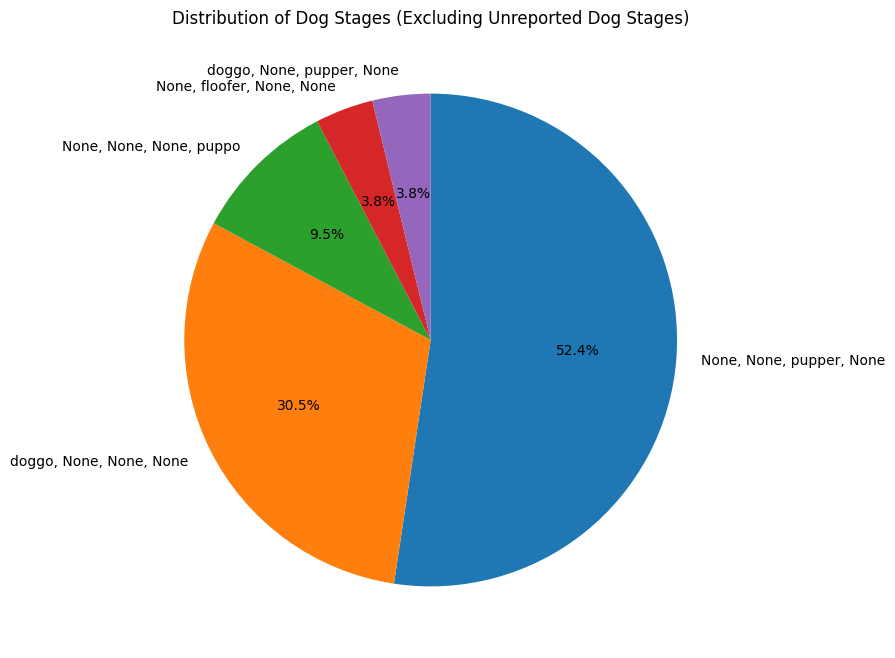

In [444]:
# Filter rows where dog_stage is not "None, None, None, None"
filtered_data = twitter_archive_master[twitter_archive_master['dog_stage'] != 'None, None, None, None']

# Count the occurrences of each dog stage
dog_stage_counts = filtered_data['dog_stage'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dog_stage_counts, labels=dog_stage_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# Add a title
plt.title('Distribution of Dog Stages (Excluding Unreported Dog Stages)')

# Show the plot
plt.show()

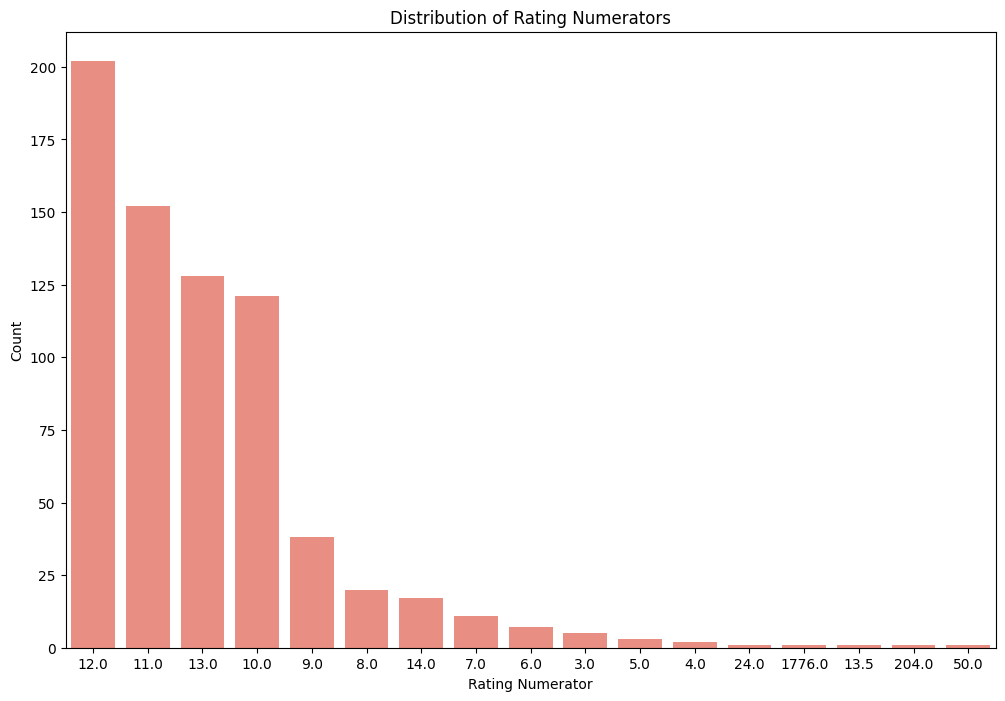

Top 10 Most Popular Ratings:
rating_numerator
12.0    202
11.0    152
13.0    128
10.0    121
9.0      38
8.0      20
14.0     17
7.0      11
6.0       7
3.0       5
Name: count, dtype: int64


In [454]:
# Plotting the distribution of rating numerators
plt.figure(figsize=(12, 8))
sns.countplot(x='rating_numerator', data=twitter_archive_master, color='salmon', order=twitter_archive_master['rating_numerator'].value_counts().index)
plt.title('Distribution of Rating Numerators')
plt.xlabel('Rating Numerator')
plt.ylabel('Count')
plt.show()

# Identifying the most popular ratings
most_popular_ratings = twitter_archive_master['rating_numerator'].value_counts().head(10)
print("Top 10 Most Popular Ratings:")
print(most_popular_ratings)

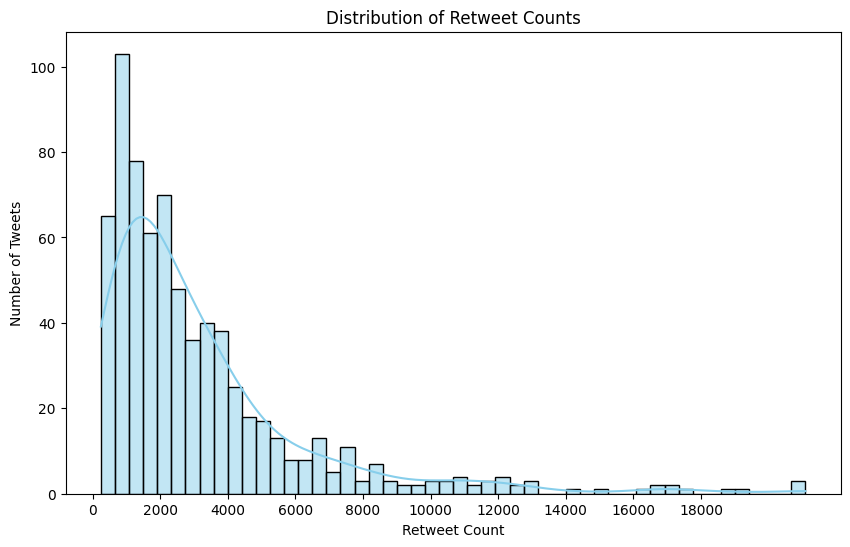

In [467]:
plt.figure(figsize=(10, 6))
sns.histplot(twitter_archive_master['retweet_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Number of Tweets')  # Updated y-axis label
plt.xticks(range(0, 20000, 2000))  # Adjust the range and step size
plt.show()